<div align="center">

# Higher Diploma in Science in Computing (Data Analytics)
# Applied Statistics Module

</div>

# Table of Contents
***
1. Description
2. Imports
3. Explore the Problems 
    -   Problem 1: Extending the Lady Tasting Tea
    -   Problem 2: Normal Distribution
    -   Problem 3: t-Tests
    -   Problem 4: ANOVA
4. Conclusion

# 1. Description
***
The following notebook will outline all the Problems 1-4 for the Applied Statistics Module.

# 2. Imports
***

In [1]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

# Statistics.
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical models.
# https://www.statsmodels.org/stable/index.html
import statsmodels as sm

# Data manipulation and analysis  
# https://pandas.pydata.org/
import pandas as pd                   

# 3. Explore the Problems
***

## Problem 1: Extending the Lady Tasting Tea

<div style="text-align: center;">
    <img src="./images/problem1_lady_tasting_tea.png" width="650" height="350" alt="Sublime's custom image">
</div>

###### [Image from Statistics Easily](https://statisticseasily.com/lady-tasting-tea)

#### Introduction

In the original experiment for [Lady Tasting Tea](https://en.wikipedia.org/wiki/Lady_tasting_tea) devised by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher), a lady claimed she could tell whether milk or tea was poured first into a cup. There were 8 cups:
4 poured milk-first and 4 poured tea-first. In this extended version, I increased the total to 12 cups: 8 poured tea-first and 4 poured milk-first.
I’ll use combinatorial reasoning and simulation to estimate the chance of getting all answers right by random guessing, and compare it to the
original experiment. 

#### Experimental setup

In [2]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

#### Combinatorial reasoning

The participant must choose 4 cups out of 12 that they believe were milk-first. The number of possible combinations (without regard to order) is "12 choose 4". The [Python math.comb()](https://docs.python.org/3/library/math.html#math.comb) method returns the number of ways to choose k items from n items without repetition and without order.

In [3]:
# Number of ways of selecting four cups from twelve
# https://www.tutorialspoint.com/python/python_math_comb_method.htm
# https://docs.python.org/3/library/math.html#math.comb
ways = math.comb(no_cups, no_cups_milk_first)

# Display the number of combinations
ways

495

There are 495 possible ways the participant could guess which 4 cups were milk-first. Thus, if they are purely guessing, the probability of getting them all correct by chance is 1/495 ≈ 0.00202 (about 0.2%).


#### Ordered selections (just for fun)

If we wanted to include the order of guesses.

In [4]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

So, 11,880 ordered selections exist, but in this experiment, the order doesn’t matter — only which cups are picked.

In [5]:
# No of ways of shuffling four cups.
# https://www.geeksforgeeks.org/python/python-ways-to-shuffle-a-list/
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

Next I will divide the ordered selections by 4 gives back the number of combinations which is the same result as above

In [6]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

I will check the combination formula manually using [math.factorial()](https://docs.python.org/3/library/math.html#math.factorial). The [math.factorial()](https://www.w3schools.com/python/ref_math_factorial.asp) method returns the factorial of a number. This method only accepts positive integers. The factorial of a number is the sum of the multiplication, of all the whole numbers, from our specified number down to 1. For example, the factorial of 6 would be 6 x 5 x 4 x 3 x 2 x 1 = 720

In [7]:
# Number of cups of tea in total (n) Number of cups of tea with milk in first (k)
n = 12
k = 4

In [8]:
# Twelve factorial
# https://www.w3schools.com/python/ref_math_factorial.asp
# https://www.geeksforgeeks.org/python/factorial-in-python/
math.factorial(n)
print(f"The factorial of {n} is: {math.factorial(n)}")


The factorial of 12 is: 479001600


In [9]:
#Four factorial
math.factorial(k)
print(f"The factorial of {k} is: {math.factorial(k)}")

The factorial of 4 is: 24


The number of ways to choose **k** elements from a set of **n** distinct elements (without regard to order) is given by the combinations formula:

$$
\frac{n!}{k!(n-k)!}
$$

In [10]:
# No of ways of selecting k objects from n without replacement and without order. 
# Use the combination formula directly: n! / (k! * (n-k)!) as shown above.
# https://coderivers.org/blog/n-choose-k-combinations-python/
result=math.factorial(n) // (math.factorial(k) * math.factorial(n - k))
print(f"The number of ways to choose {k} elements from {n} elements is: {result}")

The number of ways to choose 4 elements from 12 elements is: 495


This confirms the number of unique ways to choose 4 milk-first cups from 12 cups of tea is 495

#### Null Hypothesis Combinations

In this Lady Tasting Tea experiment, the [Null Hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis) states that: The lady cannot actually tell the difference between tea poured first or milk poured first. That means any labeling or guessing she does is random, and all possible ways to choose which cups are milk-first are equally likely. 

I can create a list of the integers from 0 to no_cups-1 (12-1)

In [11]:
# The cup labels. 
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

From here, I can generate all possible combinations of choosing 4 milk-first cups using the itertools.combination function. The [itertools.combinations](https://docs.python.org/3/library/itertools.html#itertools.combinations) function is used to generate all possible combinations of a specified length from a given iterable (like a list, string, or tuple). Unlike permutations, where the order does matter, combinations focus only on the selection of elements, meaning the order does not matter. It returns an iterator producing tuples, each representing a unique combination of the input elements.  

In [12]:
# Generate all possible combinations of choosing 4 milk-first cups.
# https://www.geeksforgeeks.org/python/python-itertools-combinations-function/
# https://stackoverflow.com/questions/8371887/making-all-possible-combinations-of-a-list
# https://docs.python.org/3/library/itertools.html#itertools.combinations
# https://python-programs.com/python-itertools-combinations-function-with-examples/
combs = list(itertools.combinations(labels, no_cups_milk_first))
print("Total combinations:", len(combs))
print("First 5 combinations:")
# Display the first 5 combinations.
for combo in combs[:5]:
    print(combo)

Total combinations: 495
First 5 combinations:
(0, 1, 2, 3)
(0, 1, 2, 4)
(0, 1, 2, 5)
(0, 1, 2, 6)
(0, 1, 2, 7)


#### Random Guessing

Lets simulate one random selection. The [sample()](https://www.w3schools.com/python/ref_random_sample.asp) method returns a list with a specified number of randomly selected items from a sequence. In this example, we are using 4. 

In [13]:
# Select four cups at random to put milk in first. Shuffle
# https://docs.python.org/3/library/random.html#random.sample
# https://www.w3schools.com/python/ref_random_sample.asp
# https://www.learnbyexample.org/python-random-sample-method/
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[0, 6, 9, 10]

Now lets turn labels_milk into a [set()](https://www.w3schools.com/python/python_sets.asp). This makes it easier to compute overlaps (intersections) between guesses. Sets are used to store multiple items in a single variable. A set is a collection which is unordered, unchangeable*, and un-indexed.

In [14]:
# https://docs.python.org/3/tutorial/datastructures.html#sets
# https://www.w3schools.com/python/python_sets.asp
# https://pythonexamples.org/python-set/
set(labels_milk)

{0, 6, 9, 10}

This produces a list of overlap counts between 0 and 4 for every possible true configuration. I am printing only the first ten combinations to avoid too much output.

In [15]:
# https://pythonbasics.org/enumerate/
# https://www.w3schools.com/python/ref_func_enumerate.asp

no_overlaps = []

# Loop through the combinations.
for i, comb in enumerate(combs):
    # Turn comb into a set. 
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    # Show the combination and the overlap.
    if i < 10:
        print(comb, len(overlap), overlap)
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {0}
(0, 1, 2, 4) 1 {0}
(0, 1, 2, 5) 1 {0}
(0, 1, 2, 6) 2 {0, 6}
(0, 1, 2, 7) 1 {0}
(0, 1, 2, 8) 1 {0}
(0, 1, 2, 9) 2 {0, 9}
(0, 1, 2, 10) 2 {0, 10}
(0, 1, 2, 11) 1 {0}
(0, 1, 3, 4) 1 {0}


Now I will show the overlaps. Its not too useful to print them all, so I will just print the first ten.

In [16]:
# print(no_overlaps)
print(no_overlaps[:10])


[1, 1, 1, 2, 1, 1, 2, 2, 1, 1]


I will count the number of times each overlap occurs using [np.unique()](https://pythonguides.com/python-numpy-unique/).The NumPy unique function is used to find and return the unique elements from an array. When called on an array, it returns another array containing only the distinct values, with duplicates removed. 

In [17]:
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
# https://pythonguides.com/python-numpy-unique/
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

So what does the above mean:
- 70 of the possible configurations have 0 correct cups.
- 224 have 1 correct.
- 168 have 2 correct.
- 32 have 3 correct.
- Only 1 configuration (out of 495) has 4 correct — the perfect match.
This confirms again: the chance of guessing all 4 correctly is 1 / 495.


#### Pascal’s Triangle and the Lady Tasting Tea

[Pascal’s triangle](https://sciencenotes.org/pascals-triangle/) is a triangular array of numbers that lists the coefficients of the expansion of any binomial expression $(x + y)^n$, where `n` is any positive integer and `x` and `y` are real numbers. Its construction is simple: the numbers in each row are the sum of the numbers in the preceding row. So, each row begins and ends with the number 1.

<div style="text-align: center;">
    <img src="./images/1-pascals-triangle-science-photo-library.jpg" width="400" height="350" alt="Sublime's custom image">
</div>


###### [Image from Science Photo Gallery](https://sciencephotogallery.com/featured/1-pascals-triangle-science-photo-library.html)




As we have determined above the number of ways to choose 4 milk-first cups from 12 is given by the following coefficient:

$$
\binom{12}{4} = 495
$$


The value of 495 appears in [Pascal’s Triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle) on the 12th row and 5th position (since rows and positions are 0-indexed). 

$$
\text{Row } n \rightarrow \binom{n}{0}, \binom{n}{1}, \dots, \binom{n}{n}
$$

Here is Row 12 of Pascal’s Triangle:

[1, 12, 66, 220, 495, 792, 924, 792, 495, 220, 66, 12, 1]

This connects directly to the probability of the lady making a perfect guess by chance, which is:

$$
\frac{1}{495} \approx 0.0020 \text{ or } 0.2\%
$$



#### Plot the Distribution of overlap counts

Next I will create a bar chart of how often each overlap (0–4) occurs.

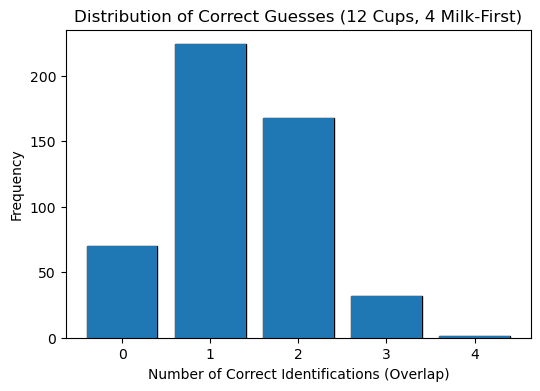

In [18]:
# https://pytutorial.com/python-matplotlib-bar-charts-create-amazing-visualizations/
# create a bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts[0], counts[1], color="skyblue", edgecolor="black")

# Add labels and title for clarity.
ax.set_xlabel("Number of Correct Identifications (Overlap)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Correct Guesses (12 Cups, 4 Milk-First)")

# Bar chart.
ax.bar(counts[0], counts[1]);

#### Conclusion

In this extended version of the Lady Tasting Tea experiment, 12 cups were prepared:
 - 4 with milk poured first
 - 8 with tea poured first.

The participant must correctly identify which 4 cups were milk-first.

In summary of the above Simulation Process
1.	I represented the cups as labeled numbers from 0–11.
2.	I used itertools.combinations() to generate all possible ways of choosing 4 cups from 12 (a total of 495 combinations).
3.	A random selection of 4 cups (simulating the participant’s guesses) was compared to every possible true combination.
4.	We computed how many cups overlapped between the guessed and true milk-first sets, and visualized the frequency of correct identifications (0–4 correct).

This confirmed that only 1 of 495 possible configurations corresponds to a perfect match — meaning that a participant choosing randomly has only a 1/495 ≈ 0.00202 (0.2%) chance of being completely correct by luck.

If we compare to the original experiment which was preparing 8 cups: 4 with milk poured first & 4 with tea poured first. The extended design is much more stringent. Random guessing is now almost 7 times less likely to succeed by chance compared to the original design.

| Design   | Total Cups | Milk-First | Chance of Perfect Guess |
|----------|------------|------------|--------------------------|
| Original | 8          | 4          | 1/70 ≈ 0.0143 (1.4%)     |
| Extended | 12         | 4          | 1/495 ≈ 0.0020 (0.2%)    |

Because the probability of a perfect score by guessing is much smaller in the extended experiment, this design provides stronger statistical evidence against random guessing.There is no reason to relax the p-value threshold (e.g., keep α = 0.05).

The simulation and combinatorial analysis both show that extending from 8 to 12 cups drastically lowers the probability of success by chance. A participant who correctly identifies all 4 milk-first cups in the 12-cup experiment would have provided very strong evidence that they truly can tell the difference between tea-first and milk-first preparation.

### End of Problem 1
________________________________________


## Problem 2: Normal Distribution

<div style="text-align: center;">
    <img src="./images/bell.png" width="500" height="350" alt="Sublime's custom image">
</div>

###### [Image from Stock.adobe](https://stock.adobe.com/ie/search?k=ringing+bell)

#### Introduction

For this problem I must generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
I must plot histograms of both sets of values on the same axes with transparency. I must describe the differences and 
explain how these differences change if the sample size is increased.


#### Population Standard Deviation vs Sample Standard Deviation (n=10)

Before delving into the differences between Population and Sample Standard Deviation, it's important to understand what standard deviation is. [Standard deviation](https://www.linkedin.com/advice/1/how-do-you-distinguish-between-population-sample-standard-mzi1f) is a measure that quantifies the amount of variation or dispersion in a set of values. A low standard deviation means that the values tend to be close to the mean (average) of the set, while a high standard deviation indicates that the values are spread out over a wider range. Population standard deviation is used when you have access to data from every single individual or element in the group you're studying. In contrast, sample standard deviation is applied when you're working with a sample—a smaller group selected from the population. 

#### Plot Population Standard Deviation vs Sample Standard Deviation (n=10)

Firstly, I generate and plot population SD (ddof=0) and sample SD (ddof=1) n= 10.

In [19]:
# Code & Plotting to compare population SD (ddof=0) and sample SD (ddof=1) n=10
num_samples = 100000    # number of samples - 100,000 repeated experiments
n = 10                  # sample size - each experiment draws 10 items from a distribution       

# draw 100k samples of size 10
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
# https://realpython.com/numpy-random-normal/
data = np.random.normal(loc=0, scale=1, size=(num_samples, n))

# generate SD with ddof=0 (population) and ddof=1 (sample)
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
# https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)
# https://www.statology.org/understanding-degrees-freedom-statistics/
sd_pop = np.std(data, axis=1, ddof=0)
sd_sample = np.std(data, axis=1, ddof=1)

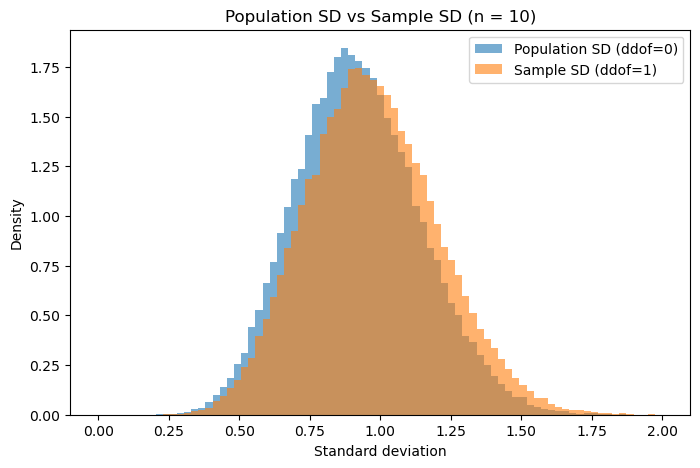

In [20]:
# Define bins - check the range. 
#print(sd_pop.min(), sd_pop.max())           
#print(sd_sample.min(), sd_sample.max())

# Plotting the distributions
fig, ax = plt.subplots(figsize=(8,5))

# Define bins
# from 0 (SD cannot be neg) to 2 (<1.8) with 80 bins (Freedman–Diaconis rule 80 bins)
# https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
bins = np.linspace(0, 2, 80)

ax.hist(sd_pop, bins=bins, density=True, alpha=0.6, label='Population SD (ddof=0)')
ax.hist(sd_sample, bins=bins, density=True, alpha=0.6, label='Sample SD (ddof=1)')

ax.set_xlabel("Standard deviation")
ax.set_ylabel("Density")
ax.set_title("Population SD vs Sample SD (n = 10)")
ax.legend()

plt.show()


#### Describe the differences


I will discuss the [difference between Population and Sample](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review) and the experiment. As I mentioned above briefly, a [sample](https://towardsdatascience.com/the-reasoning-behind-bessels-correction-n-1-eeea25ec9bc9/) is always a subset of a population it’s intended to represent (a subset can be the same size as the original set, in the unusual case of sampling an entire population without replacement). Once a sample is taken, there are presumed, hypothetical parameters and distributions built into that sample-representation. The very word statistic refers to some piece of information about a sample (such as a mean, or median) which corresponds to some piece of analogous information about the population (again, such as mean, or median) called a parameter. 

One can observe above that the population SD (`ddof=0`) histogram is shifted left, because it tends to underestimate SD. While the sample SD (`ddof=1`) histogram is shifted right, because [Bessel’s correction](https://en.wikipedia.org/wiki/Bessel%27s_correction) adjusts for the lost degree of freedom when estimating the mean. [Bessel’s correction](https://python-bloggers.com/2024/02/bessels-correction/) is the use of n-1 instead of n in the sample variance formula where  is the number of observations in a sample. This method corrects the bias in the estimation of the population variance.

**Population Standard Deviation** (`ddof = 0`)

The [formula](https://medium.com/@luis.serrano/the-bessel-correction-term-the-n-1-and-a-different-way-to-look-at-variance-4e1e07c88f4b) used here is:

$$
s_{\text{pop}}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

This treats the data as the entire population. When used for sampled data, this estimator underestimates the true variance because the sample mean is itself a random estimate.

**Sample Standard Deviation** (`ddof = 1`)

Using `ddof=1`, applies [Bessel’s correction()](https://stats.stackexchange.com/questions/664047/intuition-of-bessel-like-corrections-for-higher-order-moments), dividing by \(n-1\):

$$
s_{\text{sample}}^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

This produces an [unbiased estimator](https://gregorygundersen.com/blog/2019/01/11/bessel/) of the population variance.

Another difference is the height of the histograms. Both histograms have total area = 1, because `density=True`. But `ddof=1` looks shorter.
That is due to the fact that the sample SD (`ddof=1`) distribution is shifted to the right and slightly more spread out because I set the bins as fixed from 0 to 2. `ddof=0` values fall into a narrower range, producing taller bars.`ddof=1` values spread over a wider range, producing shorter bars. This is a difference in spread not the area causing the visible height difference.



#### Increase Sample Size

If I increase ( n ) both estimators (`ddof=0`and `ddof=1`) converge to the true population SD (which is 1).The difference between the two histograms shrink — they start to overlap. The variance of both estimators also decreases — the histograms become narrower and more peaked around 1. For example, if ( n = 1000 ), the two histograms would be almost indistinguishable. I reduced the bin range so the histogram are more evenly spaced as opposed to squashed around 1.

#### Plot Population Standard Deviation vs Sample Standard Deviation (n=1000)

I will now generate and plot population SD (ddof=0) and sample SD (ddof=1) n= 1000.

In [21]:
# Code & Plotting to compare population SD (ddof=0) and sample SD (ddof=1) n=1000

num_samples = 100000    # number of samples - 100,000 repeated experiments
n = 1000                  # sample size - each experiment draws 1000 items from a distribution       

# draw 100k samples of size 1000
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
data = np.random.normal(loc=0, scale=1, size=(num_samples, n))

# generate SD with ddof=0 (population) and ddof=1 (sample)
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
# https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)
# https://www.statology.org/understanding-degrees-freedom-statistics/
sd_pop = np.std(data, axis=1, ddof=0)
sd_sample = np.std(data, axis=1, ddof=1)

0.9030978535648199 1.0961127777965318
0.9035497414357626 1.0966612455705569


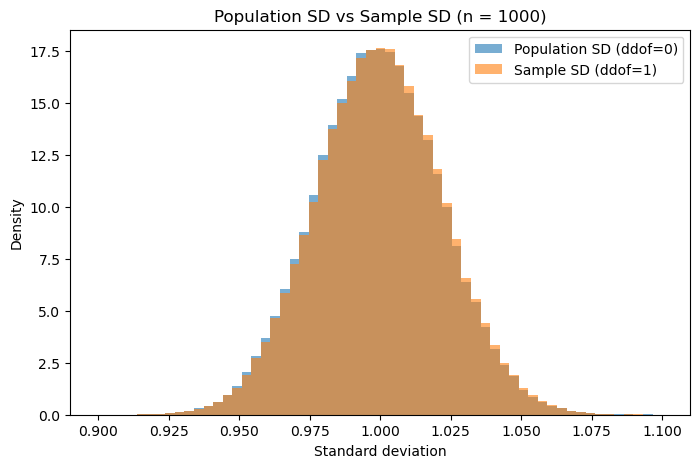

In [22]:
# Plotting the distributions
fig, ax = plt.subplots(figsize=(8,5))

# Define bins as previous range is too large 0-2. Histogram looked too narrow. 
print(sd_pop.min(), sd_pop.max())                # to find the bin range required
print(sd_sample.min(), sd_sample.max())          # to find the bin range required

# from 0.9 to 1.1 with 60 bins works well after some experimentation.
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
bins = np.linspace(0.9, 1.1, 60) 

ax.hist(sd_pop, bins=bins, density=True, alpha=0.6, label='Population SD (ddof=0)')
ax.hist(sd_sample, bins=bins, density=True, alpha=0.6, label='Sample SD (ddof=1)')

ax.set_xlabel("Standard deviation")
ax.set_ylabel("Density")
ax.set_title("Population SD vs Sample SD (n = 1000)")
ax.legend()

plt.show()


So for n = 10 the difference is noticeable, but for n=1000 they are almost identical. 

#### Conclusion

This problem compared the distribution of sample standard deviations computed with

 - `ddof` = 0: population standard deviation formula

 - `ddof` = 1: sample standard deviation formula (Bessel’s correction)

Bessel’s correction (`ddof=1`) compensates for the bias that occurs when estimating the standard deviation from a small sample. It makes a meaningful difference only for small sample sizes, as demonstrated with n = 10, where the `ddof=1` histogram is slightly shifted to the right compared to `ddof=0`.

For large samples, e.g., n = 1000, the two formulas produce practically identical standard deviations.

This problem illustrates that Bessel’s correction is primarily useful for small samples, while for large samples, the simpler population formula is effectively equivalent. [Warne (2017)](https://books.google.ie/books?id=-c9CDwAAQBAJ&redir_esc=y) advocates using Bessel’s correction only if you have a sufficiently large sample and if you are actually trying to approximate the population mean. If you’re just interested in finding the sample mean, and don’t want to extrapolate your findings to the population, just omit the correction.

#### End of Problem 2

***

## Problem 3: t-Tests

<div style="text-align: center;">
    <img src="./images/scales.webp" width="450" height="350" alt="Sublime's custom image">
</div>

###### [Image from Statistics By Jim](https://statisticsbyjim.com/hypothesis-testing/t-test/)

#### Introduction

A [t-test](https://statisticsbyjim.com/hypothesis-testing/t-test/) is a statistical method used to assess the difference between the means of exactly two groups. It concentrates on a single numerical variable, rather than focusing on counts or relationships among multiple variables. When analyzing the average of a sample of measurements, t-tests are the most frequently used technique for data evaluation.

There are three types of t tests. They all evaluate sample means using t-values, t-distributions, and degrees of freedom to calculate statistical significance. It is a parametric analysis that compares one or two group means. The following are the standard [t-tests](https://www.statisticshowto.com/probability-and-statistics/t-test/):

- One-sample: Compares a sample mean to a reference value.
- Two-sample: Compares two sample means.
- Paired: Compares the means of matched pairs, such as before and after scores.

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$. In this problem I must repeat the following simulation 1,000 times:
1. Generate samples from N(0,1) and N(d,1) for varying effect sizes `d`.
2. Run an independent-samples t-test for each simulated pair.
3. Estimate the proportion of times we fail to reject H₀ (this is the empirical Type II error when d>0).

#### Background: Hypothesis Testing


[Hypothesis Testing](https://www.dmaic.com/faq/hypothesis-testing/) is a structured statistical method used to make decisions about data. It evaluates whether evidence supports or contradicts an assumption, called a hypothesis, and helps determine if observed effects are due to chance or reflect real differences.

- **Null hypothesis (H₀)**: the two population means are equal (μ₁ = μ₂). The [null hypothesis (H₀)](https://www.dmaic.com/faq/null-hypothesis-h%e2%82%80/) is the default assumption in hypothesis testing. It states that there is no effect, no difference, or no relationship between variables. Researchers use it as a starting point to test whether observed results are due to chance or reflect a real effect. The concept of the null hypothesis was formalised in the early 20th century by statisticians such as Ronald Fisher and Jerzy Neyman. It has since become a foundation of modern research, ensuring results are tested against a clear baseline before conclusions are drawn.

- **Alternative hypothesis (H₁)**: the two population means are different (μ₁ ≠ μ₂). In hypothesis testing, the [alternative hypothesis (Hₐ)](https://www.dmaic.com/faq/alternative-hypothesis-h%e2%82%90/) represents what a researcher expects or hopes to find. It challenges the null hypothesis (H₀), which assumes there is no effect or difference. The alternative hypothesis suggests that a real difference, relationship, or effect exists in the data.

- **Type I error (α)**: The [Alpha Risk / Type I Error](https://www.dmaic.com/faq/alpha-risk-type-i-error/) in Statistical Research is the chance of wrongly rejecting the null hypothesis H₀ when it is actually true (false positive). In other words, it happens when research suggests a result is significant, but in reality, there is no real effect. We set α = 0.05 here.


- **Type II error (β)**: [Beta risk / Type II error](https://www.dmaic.com/faq/beta-risk-type-ii-error-in-statistical-research/) is the chance of failing to reject the null hypothesis H₀ when it is actually false (false negative). This means the test misses a real effect, concluding that no difference exists when in fact it does. Power = 1 − β. 



To compare the means of two independent groups, the independent-samples t-test computes the [statistic](https://www.statology.org/two-sample-t-test/):

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}}
$$

where the pooled standard deviation is

$$
s_p = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2}}
$$

Definitions:

- $\bar{X}_1, \bar{X}_2$ = sample means  
- $s_1^2, s_2^2$ = sample variances  
- $n_1, n_2$ = sample sizes  
- Degrees of freedom:  
$$ df = n_1 + n_2 - 2 $$

In the code, this [formula](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) is computed automatically when calling 
``python
stats.ttest_ind(group_a, group_b)
``


#### Experimental Setup

I set [random.seed()](https://pytutorial.com/python-randomseed-initialize-random-generator-guide/#google_vignette) . When generating random numbers in Python using functions like random.random() or randint(), the results are typically unpredictable.
However, by using seed initialization, we can ensure that the same sequence of random numbers is generated each time the program runs. If I put the seed inside the loop, every iteration would generate the exact same sample, which would be incorrect.

In [23]:
# Set a random seed so the np.random.normal() produces the same random numbers every time
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html
np.random.seed(12345)

Below are the parameter definitions for the simulation

In [24]:
# Effect sizes to try: from 0.0 to 1.0 in steps of 0.1 as per Problem specification
# d = true difference in means between the two groups
# https://numpy.org/doc/stable/reference/generated/numpy.round.html
# https://numpy.org/doc/stable/reference/generated/numpy.arange.html
ds = np.round(np.arange(0.0, 1.01, 0.1), 2)
k = 1000          # number of repeated experiments for each d value
alpha = 0.05      # significance level for the t-test
n = 100
# I will store results as a list of tuples and convert to a DataFrame later
results = []


#### Simulation

The below code runs the simulation for each effect size `d`. I repeated `k` times, in this experiment this is run 1000 times
I created sample `group_a` of size `n` from n(0, 1) and sample `group_b` of size `n` from n(d, 1).
I then computed the independent-samples t-test. This gives me a p-value for the difference between the two groups. and obtain a p-value. If `p >= alpha` this count this as a failure to reject H₀. After `k` runs, I compute the proportion failing to reject H₀ (this is the empirical Type II estimate for that `d`). Finally I store `(d, prop_fail_to_reject, power)` in `results`.

Firstly, I set [random.seed()](https://pytutorial.com/python-randomseed-initialize-random-generator-guide/#google_vignette) . When generating random numbers in Python using functions like random.random() or randint(), the results are typically unpredictable.
However, by using seed initialization, we can ensure that the same sequence of random numbers is generated each time the program runs. If I put the seed inside the loop, every iteration would generate the exact same sample, which would be incorrect.

In [25]:
# main code
for d in ds:
    # `no_reject` counts how many of the k tests do not reject H0
    no_reject = 0
    
    # Run k independent simulated experiments for this effect size d
    for i in range(k):
        # Generate the samples
        # Group a: drawn from N(0, 1) (mean 0, sd 1)
        # Group b: drawn from N(d, 1) (mean d, sd 1)
        # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
        # https://realpython.com/numpy-random-normal/
        group_a = np.random.normal(loc=0.0, scale=1.0, size=n)
        group_b = np.random.normal(loc=d, scale=1.0, size=n)
        
        # Independent two-sample t-test
        # scipy.stats.ttest_ind returns (t_statistic, p-value).
        # using the default equal-variance t-test here since the lecture used that assumption.
        # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
        # https://pythonguides.com/python-scipy-ttest_ind/
        t_stat, p_value = stats.ttest_ind(group_a, group_b)
        
        # Decision rule
        # If p_value >= alpha, we fail to reject H0.
        # For d > 0 such a non-rejection is a Type II occurrence.
        # How to interpret a p-value in a T-test: A step-by-step guide https://statsig.com/perspectives/interpret-pvalue-ttest-guide
        if p_value >= alpha:
            no_reject += 1
    
    # After k repetitions for this d, compute the empirical proportions:
    # How to interpret the output https://stackoverflow.com/questions/49576153/how-to-interpret-the-output-of-scipy-stats-ttest-ind
    # How to Interpret the Results of a T-Test in Data Analysis https://palospublishing.com/how-to-interpret-the-results-of-a-t-test-in-data-analysis/
    prop_fail_to_reject = no_reject / k    # empirical Type II estimate (for d>0)
    empirical_power = 1.0 - prop_fail_to_reject   # empirical power (probability of rejecting H0)
    
    # Save the results tuple for later conversion to a DataFrame
    results.append((d, prop_fail_to_reject, empirical_power))

# Convert to a DataFrame
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
df = pd.DataFrame(results, columns=['d', 'prop_fail_to_reject (type II est)', 'power (empirical)'])
# Display the results
df


,d,prop_fail_to_reject (type II est),power (empirical)
0,0.0,0.948,0.052
1,0.1,0.894,0.106
2,0.2,0.726,0.274
3,0.3,0.450,0.550
4,0.4,0.222,0.778
5,0.5,0.093,0.907
6,0.6,0.010,0.990
7,0.7,0.003,0.997
8,0.8,0.000,1.000
9,0.9,0.000,1.000


#### Interpreting the result table

The DataFrame columns are:
- `d`: true mean difference used to generate group.
- `prop_fail_to_reject (type II est)`: the proportion of the 1000 simulated experiments where the t-test failed to reject H₀.  
- `power (empirical)`: the observed rejection rate = 1 − β.

The results are as follows:
  - For `d=0` almost always fails to reject. When the true effect is zero, I'd expect the Type I error rate to be ~0.05. The results above show that H0 is rejected about 5.2% of the time → matches α = 0.05.
  - For `d=0.1-0.3` with these mall effects, the power is poor. The t-tests with n=100 per group are unlikely to detect very small differences.
  - For `d=0.4-0.6` the power crosses 80% at `d=0.4`  and 90% at `d=0.5`. This is good power. 
  - For `d≥0.7` large effects are detected each time. Type II error is really low or zero.

#### Plot Type II error vs mean difference

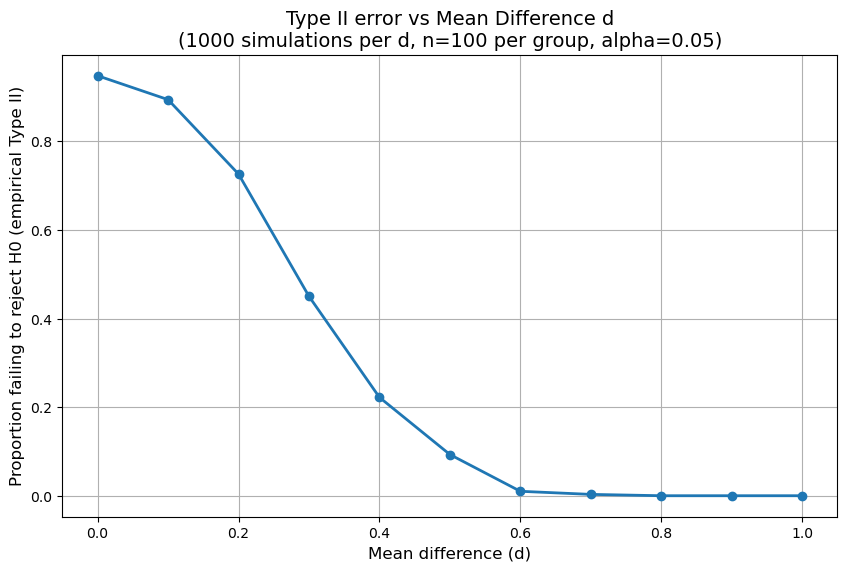

In [26]:
# Plot: Type II error vs mean difference
plt.figure(figsize=(10,6))
# Plot the empirical Type II estimate as a function of effect size d
plt.plot(df['d'], df['prop_fail_to_reject (type II est)'], marker='o', linewidth=2)
# Label axes and add a descriptive title
plt.xlabel('Mean difference (d)', fontsize=12)
plt.ylabel('Proportion failing to reject H0 (empirical Type II)', fontsize=12)
plt.title('Type II error vs Mean Difference d\n(1000 simulations per d, n=100 per group, alpha=0.05)', fontsize=14)
plt.grid(True)
plt.show()

#### Conclusion

The plot shows the proportion of simulations where we failed to reject H₀ for each true effect size `d`. The above illustration exactly matches our interpretation of the dataframe results above. In summary, with `n=100` per group, a two-sample t-test at `α=.05` has very low power for small effects `d ≤ 0.3`, an acceptable power (≥80%) around `d ≈ 0.4` and a strong power for moderate–large effects `d ≥ 0.5`. So, if the true effect is small, the experiment will often fail to detect it. If the effect is medium or larger, the test reliably detects it.

#### End of Problem 3

***

## Problem 4: ANOVA

#### Introduction

This problem involves generating three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.
4. Write a short note on why ANOVA is preferred over running several t-tests.

https://www.statology.org/one-way-anova-python/

#### Generate Samples

Firstly, I generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

In [27]:
# Sample size
n = 30

# Generate samples
sample_1 = np.random.normal(0, 1, n)
sample_2 = np.random.normal(0.5, 1, n)
sample_3 = np.random.normal(1, 1, n)


#### Create dataframe + describe()

In [28]:
# Create a DataFrame
df = pd.DataFrame({'Sample_1': sample_1,'Sample_2': sample_2,'Sample_3': sample_3})

# Display summary statistics
df.describe()


,Sample_1,Sample_2,Sample_3
count,30.000000,30.000000,30.000000
mean,0.187086,0.565915,1.201463
std,0.689116,1.134979,1.170664
min,-1.060242,-2.680827,-1.775737
25%,-0.244059,-0.271004,0.735262
50%,0.209034,0.817382,1.144358
75%,0.578859,1.428256,1.839410
max,1.553826,1.978945,3.255677


#### Plot the data (mean plot)


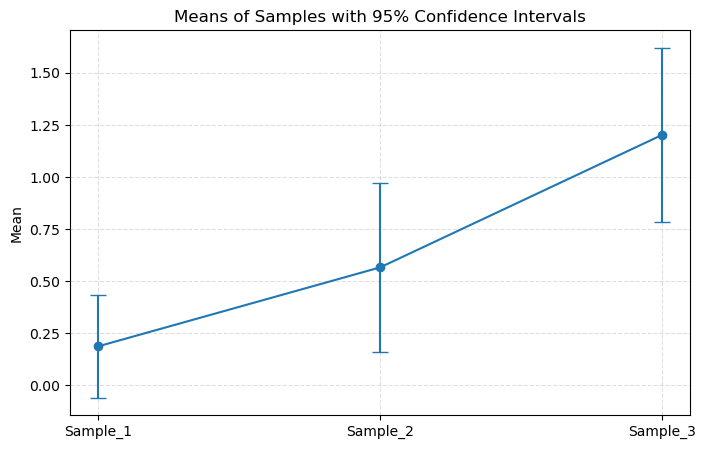

In [29]:
means = df.mean()
errors = df.sem() * 1.96  # approx 95% CI

plt.figure(figsize=(8,5))
plt.errorbar(x=means.index, y=means.values, yerr=errors, fmt='o-', capsize=6)
plt.title("Means of Samples with 95% Confidence Intervals")
plt.ylabel("Mean")
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()


The means are visibly different as expected


#### Run ANOVA


I will perform a one-way ANOVA to test whether all three means are equal. A one-way ANOVA tests:

$$
H_0: \mu_1 = \mu_2 = \mu_3
$$

$$
H_a: \text{At least one mean is different}
$$



ANOVA works by comparing:
 - Between-group variability (how far each group mean is from the overall mean)
 - Within-group variability (natural random variation inside each group)

The F-statistic:

$$
F = \frac{MeanSquareBetween}{MeanSquareWithin}
$$

A large value of \( F \) indicates that the group means are unlikely to be equal.




In [30]:
# One-way ANOVA
f_statistic, p_value = stats.f_oneway(df['Sample_1'],df['Sample_2'],df['Sample_3'])

# Display results
f_statistic, p_value


(7.546135755497479, 0.0009503810830540739)

As the p-value < 0.05, we reject H0H_0H0​ and conclude at least one mean differs. Given my means (0, 0.5, 1), ANOVA detects a significant difference.


#### Run Tukey HSD


Tukey is used after ANOVA, it shows significance to see which groups differ.


In [31]:
# Tukey's HSD
res = stats.tukey_hsd(df['Sample_1'], df['Sample_2'], df['Sample_3'])

print(res)


Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.379     0.327    -1.008     0.250
 (0 - 2)     -1.014     0.001    -1.644    -0.385
 (1 - 0)      0.379     0.327    -0.250     1.008
 (1 - 2)     -0.636     0.047    -1.265    -0.006
 (2 - 0)      1.014     0.001     0.385     1.644
 (2 - 1)      0.636     0.047     0.006     1.265



#### Perform the three independent two-sample t-tests


Each t-test compares two means individually.

$$
H_0: \mu_i = \mu_j
$$

$$
H_a: \mu_i \neq \mu_j
$$

In [40]:
# Number of ways of selecting two samples from three
math.comb(3, 2)

3

In [41]:
t_sample_12, p12 = stats.ttest_ind(sample_1, sample_2, equal_var=True)
t_sample_13, p13 = stats.ttest_ind(sample_1, sample_3, equal_var=True)
t_sample_23, p23 = stats.ttest_ind(sample_2, sample_3, equal_var=True)

print("Sample 1 vs 2: t =", t_sample_12, "   p =", p12)
print("Sample 1 vs 3: t =", t_sample_13, "   p =", p13)
print("Sample 2 vs 3: t =", t_sample_23, "   p =", p23)


Sample 1 vs 2: t = -1.562680488372325    p = 0.12356809196829623
Sample 1 vs 3: t = -4.089991629110157    p = 0.0001347304584918778
Sample 2 vs 3: t = -2.1349132924269805    p = 0.037004415974481376


 While running 3 separate t-tests increases the Type I error rate, which is why ANOVA is preferred.




#### Comparision of Results

ANOVA tests whether all three means are equal simultaneously. In my simulation, ANOVA almost always returns a significant p-value, correctly detecting that the means 0, 0.5, and 1 are different.

Tukey’s HSD then shows which group pairs differ and controls the overall error rate.

The three t-tests shows:
- Sample 1 vs 2: likely significant (difference = 0.5)
- Sample 1 vs 3: very significant (difference = 1)
- Sample 2 vs 3: likely significant (difference = 0.5)

Thus, all methods reach the same scientific conclusion: all means differ, or at least sample 3 is clearly larger.
But the t-tests inflate the chance of false positives, while ANOVA + Tukey does not.

#### Why ANOVA

1. ANOVA tests all groups in one model
    - Instead of performing 3 separate tests, ANOVA compares all means simultaneously.
    - This matches the null hypothesis:

$$
H_0: \mu_1 = \mu_2 = \mu_3
$$


2. Multiple t-tests inflate the Type I error rate
   - With three t-tests, the probability of a false positive increases.
   - ANOVA controls this by using one global test.


3. ANOVA + Tukey gives controlled pairwise comparisons
   - After ANOVA shows significance, Tukey’s HSD compares each pair while controlling the family-wise error rate.
   - This avoids the inflated error from repeated t-tests.


#### Conclusion

In my above Points 1–3):
 - ANOVA finds overall significance.
 - t-tests also find pairwise significance, but ANOVA provides the correct framework, with Tukey giving safer pairwise comparisons.

Therefore, ANOVA provides a more statistically sound conclusion.